In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [79]:
path = 'D:\dataset\Grover.xlsx'

In [80]:
Sheets = pd.ExcelFile(path)

In [81]:
sheet_names = Sheets.sheet_names
for sheet_name in sheet_names:
    print(sheet_name)

Task
DATA
Growth Targets May


In [82]:
df = pd.read_excel('D:\dataset\Grover.xlsx',sheet_name='DATA',header = 2)

In [83]:
df.head()

,#,Name,Category,Brand,SOH,Avg. AGE,Orders,Cancellations,Pageviews,MKT,1.0,3.0,6.0,12.0
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90 , 99.90","49.90 , 69.90","44.90 , 64.90","39.90 , 59.90"
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,"34.90 ,","24.90 ,","19.90 ,","14.90 ,"
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,"119.90 ,","89.90 ,","69.90 ,","64.90 ,"
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,"129.90 ,","79.90 ,","69.90 ,","59.90 ,"
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,0.0,"129.90 , 159.90","89.90 , 119.90","59.90 , 79.90"


# # Renamming columns

In [84]:
df.rename(columns={'#': 'Rank','SOH':'Stock_In_Hand', 'MKT':'MarketPrice'}, inplace=True)


In [85]:
df.columns = df.columns[:-4].tolist() + [f'{int(col)}_M' for col in df.columns[-4:]] # M stands for Month, 1,3,6,12 months subscription plans

# # Data Cleaning

In [86]:
columns_to_modify = ['1_M', '3_M', '6_M', '12_M'] #removing extra spaces and extra ',' in the columns
for column in columns_to_modify:
    df[column] = df[column].str.replace(r'[, ]*$',' ')
    df[column] = df[column].str.replace(' ', '')

C:\Users\User\AppData\Local\Temp/ipykernel_1660/437332041.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'[, ]*$',' ')


# # Handling Null Values


In [87]:
(df.isnull().sum()/df.shape[0])*100

Rank              0.000000
Name              0.000000
Category          0.000000
Brand             0.000000
Stock_In_Hand     0.000000
Avg. AGE          0.000000
Orders            0.000000
Cancellations     0.000000
Pageviews        11.295681
MarketPrice       0.000000
1_M               3.654485
3_M               0.332226
6_M               0.332226
12_M              0.332226
dtype: float64

In [88]:
# As we identify percentage of nulls in the features is less than 20 %, Hence we can fill the missing values using KNN imputation methods.as it identifies the K-nearest datapoints with available page view values.  

In [89]:
df.dtypes

Rank             float64
Name              object
Category          object
Brand             object
Stock_In_Hand    float64
Avg. AGE         float64
Orders           float64
Cancellations    float64
Pageviews        float64
MarketPrice      float64
1_M               object
3_M               object
6_M               object
12_M              object
dtype: object

In [90]:
df.columns

Index(['Rank', 'Name', 'Category', 'Brand', 'Stock_In_Hand', 'Avg. AGE',
       'Orders', 'Cancellations', 'Pageviews', 'MarketPrice', '1_M', '3_M',
       '6_M', '12_M'],
      dtype='object')

In [91]:
columns_to_exclude = ['1_M', '3_M', '6_M', '12_M','Name']
df_filtered = df.drop(columns=columns_to_exclude)

In [92]:
df_filtered.head(2)

,Rank,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice
0,1.0,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0
1,2.0,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0


In [94]:
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_filtered[col] = label_encoders[col].fit_transform(df_filtered[col])

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_filtered)

for col in categorical_columns:
    imputed_data[:, df_filtered.columns.get_loc(col)] = label_encoders[col].inverse_transform(imputed_data[:, df_filtered.columns.get_loc(col)].astype(int))

imputed_df = pd.DataFrame(imputed_data, columns=df_filtered.columns)

In [95]:
imputed_df.head(2)

,Rank,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice
0,1.0,24.0,33.0,329.0,39.765957,192.0,32.0,10345.0,1101.0
1,2.0,18.0,25.0,389.0,11.871465,222.0,43.0,12466.0,229.0


In [96]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90"
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90


In [97]:
df['Pageviews'] = imputed_df['Pageviews']

In [98]:
df.isnull().sum()

Rank              0
Name              0
Category          0
Brand             0
Stock_In_Hand     0
Avg. AGE          0
Orders            0
Cancellations     0
Pageviews         0
MarketPrice       0
1_M              11
3_M               1
6_M               1
12_M              1
dtype: int64

# # General  Metrics


In [99]:
df['Orders'].sum() # Total number of orders received

6638.0

In [100]:
df['Cancellations'].sum() # Total Cancelled Orders

3940.0

In [101]:
round(df['Pageviews'].sum()) # Total page views recorded


425833

In [102]:
df['Stock_In_Hand'].sum() # Total Stock left with us

8124.0

In [103]:
df['Name'].nunique() # Total of 301 SKU's

301

In [104]:
df['Category'].nunique() #30 different categories

30

# Exploratory Data Analysis

In [105]:
Orders_By_Category = df.groupby('Category')['Orders'].sum().sort_values(ascending=False).reset_index()

In [106]:
Orders_By_Category['Percentage_of_total_orders_received'] = (Orders_By_Category['Orders'] / Orders_By_Category['Orders'].sum()) * 100


In [107]:
Orders_By_Category

,Category,Orders,Percentage_of_total_orders_received
0,phones-and-tablets/smartphones,1726.0,26.001808
1,phones-and-tablets/tablets,667.0,10.048207
2,gaming-and-vr/gaming-consoles,661.0,9.957819
3,audio-and-music/headphones,643.0,9.686653
4,wearables/apple-watches,586.0,8.827960
5,gaming-and-vr/virtual-reality,463.0,6.974992
6,computers/laptops,456.0,6.869539
7,drones/for-pro,276.0,4.157879
8,wearables/smartwatches,179.0,2.696595
9,phones-and-tablets/phone-accessories,173.0,2.606207


In [108]:
Orders_By_Category = Orders_By_Category[:7]

In [109]:
Orders_By_Category['Category'] = Orders_By_Category['Category'].str.split('/').str[-1]


C:\Users\User\AppData\Local\Temp/ipykernel_1660/2268057442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_By_Category['Category'] = Orders_By_Category['Category'].str.split('/').str[-1]


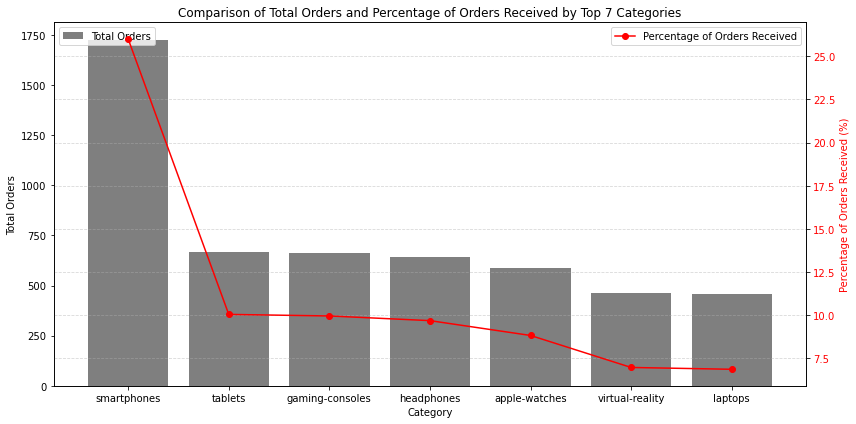

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(Orders_By_Category['Category'], Orders_By_Category['Orders'], color='black', alpha=0.5, label='Total Orders')

ax1.set_xlabel('Category')

ax1.set_ylabel('Total Orders', color='black')

ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.plot(Orders_By_Category['Category'], Orders_By_Category['Percentage_of_total_orders_received'], color='r', marker='o', label='Percentage of Orders Received')

ax2.set_ylabel('Percentage of Orders Received (%)', color='r')

ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(loc='upper left')

ax2.legend(loc='upper right')

plt.title('Comparison of Total Orders and Percentage of Orders Received by Top 7 Categories')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()


In [111]:
def calculate_avg_price(row):
    prices = []
    for col in ['1_M', '3_M', '6_M', '12_M']:
        if not pd.isna(row[col]):
            try:
                prices.extend([float(row[col].split(",")[1])])
            except:
                prices.extend([float(row[col].split(",")[0])])

    if prices:
        return sum(prices) / len(prices)
    else:
        return None

In [112]:
df['Avg_Subscription_Price'] = df.apply(calculate_avg_price, axis=1)


In [113]:
df.head()

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,119.90,89.90,69.90,64.90,86.15
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,129.90,79.90,69.90,59.90,84.90
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,NaN,"129.90,159.90","89.90,119.90","59.90,79.90",119.90


In [114]:
df['Total_Revenue_Product'] = df['Orders'] * df['Avg_Subscription_Price']

In [115]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.8
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.3


In [116]:
category_revenue = df.groupby('Category')['Total_Revenue_Product'].sum().sort_values(ascending=False).reset_index()


In [117]:
category_revenue.rename({'Total_Revenue_Product':'Total_category_revenue'},axis=1,inplace=True)

In [118]:
category_revenue

,Category,Total_category_revenue
0,phones-and-tablets/smartphones,124916.65
1,computers/laptops,42675.65
2,phones-and-tablets/tablets,35469.05
3,gaming-and-vr/virtual-reality,24049.95
4,wearables/apple-watches,22532.40
5,gaming-and-vr/gaming-consoles,22239.15
6,drones/for-pro,16666.15
7,audio-and-music/headphones,15146.20
8,home-entertainment/tv,9605.30
9,computers/gaming-computers,6107.70


In [46]:
Revenue_generated = category_revenue['Total_category_revenue'].sum()

round(Revenue_generated)

356759

In [47]:
category_revenue['Percentage_Category_revenue'] = (category_revenue['Total_category_revenue'] / category_revenue['Total_category_revenue'].sum()*100).sort_values(ascending=False)

In [48]:
category_revenue.head(5)

,Category,Total_category_revenue,Percentage_Category_revenue
0,phones-and-tablets/smartphones,124916.65,35.014256
1,computers/laptops,42675.65,11.962025
2,phones-and-tablets/tablets,35469.05,9.942009
3,gaming-and-vr/virtual-reality,24049.95,6.741224
4,wearables/apple-watches,22532.40,6.315853


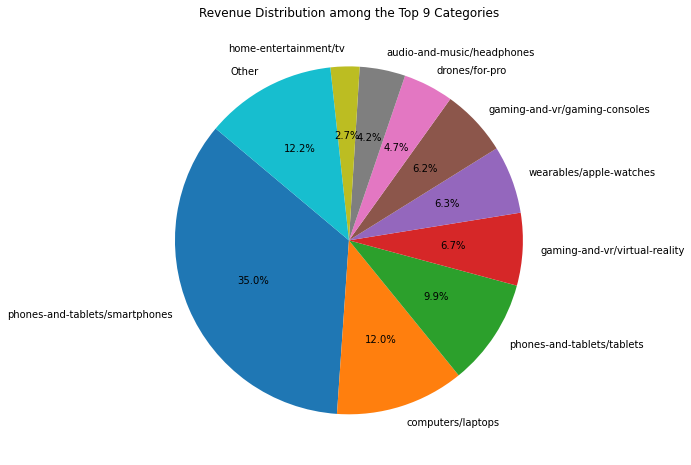

In [49]:
top_n = 9

top_categories = category_revenue.head(top_n)

other_revenue = Revenue_generated - top_categories['Total_category_revenue'].sum()

top_and_other_categories = top_categories.append({'Category': 'Other', 'Total_category_revenue': other_revenue}, ignore_index=True)

plt.figure(figsize=(8, 8))

plt.pie(top_and_other_categories['Total_category_revenue'], labels=top_and_other_categories['Category'], autopct='%1.1f%%', startangle=140)

plt.title(f'Revenue Distribution among the Top {top_n} Categories')

plt.show()


In [50]:
High_Demand_Product = df.groupby("Name")[["Orders",'Stock_In_Hand']].sum().sort_values(by='Orders',ascending=False).reset_index()[:10]

In [51]:
High_Demand_Product

,Name,Orders,Stock_In_Hand
0,Product 8,382.0,126.0
1,Product 2,222.0,389.0
2,Product 130,198.0,10.0
3,Product 1,192.0,329.0
4,Product 37,171.0,24.0
5,Product 21,164.0,71.0
6,Product 7,156.0,245.0
7,Product 22,132.0,65.0
8,Product 73,131.0,11.0
9,Product 12,128.0,71.0


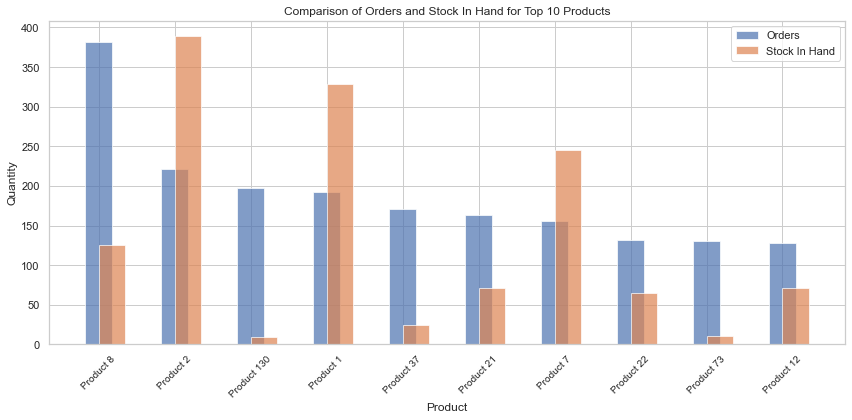

In [184]:
plt.figure(figsize=(12, 6))

bar_width = 0.35

index = range(len(High_Demand_Product))

plt.bar(index, High_Demand_Product['Orders'], bar_width, label='Orders', align='center', alpha=0.7)

plt.bar(index, High_Demand_Product['Stock_In_Hand'], bar_width, label='Stock In Hand', align='edge', alpha=0.7)

plt.xlabel('Product')

plt.ylabel('Quantity')

plt.title('Comparison of Orders and Stock In Hand for Top 10 Products')

plt.xticks(index, High_Demand_Product['Name'], rotation=45, fontsize=10)

plt.legend()

plt.tight_layout()

plt.show()

In [185]:
Most_selling_Brand = df.groupby("Brand")["Orders"].sum().sort_values(ascending=False).reset_index()[:10]


In [201]:
Most_selling_Brand = Most_selling_Brand[:8]

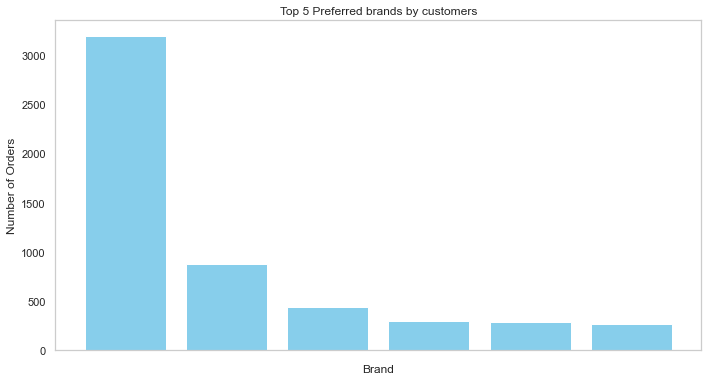

In [203]:
plt.figure(figsize=(10, 6))

plt.bar(Most_selling_Brand['Brand'], Most_selling_Brand['Orders'], color='skyblue')

plt.xlabel('Brand')

plt.ylabel('Number of Orders')

plt.title('Top 5 Preferred brands by customers')

plt.xticks(rotation=45)

plt.grid(False)


plt.tight_layout()

plt.gca().set_xticklabels([])

plt.show()

In [56]:
#Calculate the revenue per brand & Stock in hand 

In [215]:
df.columns

Index(['Rank', 'Name', 'Category', 'Brand', 'Stock_In_Hand', 'Avg. AGE',
       'Orders', 'Cancellations', 'Pageviews', 'MarketPrice', '1_M', '3_M',
       '6_M', '12_M', 'Avg_Subscription_Price', 'Total_Revenue_Product',
       'Revenue_lost_Cancellations', 'Cancellation_cost_ratio'],
      dtype='object')

In [216]:
Avg_Revenue_per_brand = df.groupby('Brand')['Total_Revenue_Product'].mean().sort_values(ascending=False).reset_index()

In [217]:
Avg_Revenue_per_brand.rename({'Total_Revenue_Product':'Average_brand_revenue'},axis=1,inplace=True)

In [219]:
Avg_Revenue_per_brand

,Brand,Average_brand_revenue
0,segway,3196.800000
1,htc,3003.775000
2,oculus,2908.937500
3,nintendo,2300.300000
4,apple,1933.418681
5,dji,1754.855000
6,samsung,1708.811275
7,omen,1678.600000
8,sony,975.598039
9,sigma,856.100000


In [61]:
Top_Revenue_generating_brands = df.groupby('Brand')['Total_Revenue_Product'].sum().sort_values(ascending=False).reset_index()

In [62]:
Top_Revenue_generating_brands.rename({'Total_Revenue_Product':'Total_Revenue_Generated_Brand'},axis=1,inplace=True)

In [208]:
Top_Revenue_generating_brands = Top_Revenue_generating_brands.head()

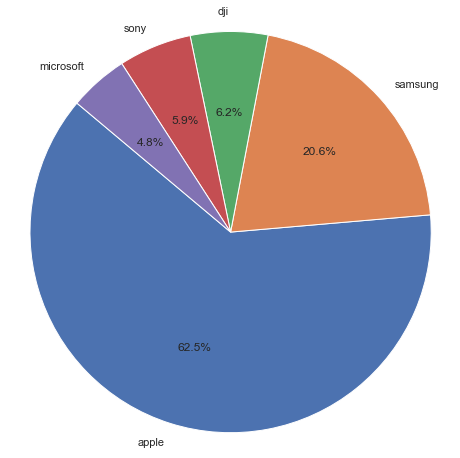

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

Top_Revenue_generating_brands = pd.DataFrame({
    'Brand': ['apple', 'samsung', 'dji', 'sony', 'microsoft'],
    'Total_Revenue_Generated_Brand': [175941.100000, 58099.583333, 17548.550000, 16585.166667, 13398.150000]
})

# Convert the revenue column to thousands, round to 2 digits, and add a comma separator
Top_Revenue_generating_brands['Total_Revenue_Generated_Brand'] = (Top_Revenue_generating_brands['Total_Revenue_Generated_Brand'] / 1000).round(2).apply(lambda x: "{:,.2f}".format(x))

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    Top_Revenue_generating_brands['Total_Revenue_Generated_Brand'],
    labels=Top_Revenue_generating_brands['Brand'],
    autopct='%1.1f%%',
    startangle=140,
)
#plt.title('Total Revenue Generated by Brands', y=1.08)  # Adjust the y-coordinate of the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [64]:
Stock_Brand = df.groupby('Brand')['Stock_In_Hand'].sum().sort_values(ascending=False).reset_index()[:10]

In [65]:
Stock_Brand

,Brand,Stock_In_Hand
0,apple,2880.0
1,samsung,1166.0
2,gopro,607.0
3,dji,555.0
4,microsoft,403.0
5,nintendo,394.0
6,acer,359.0
7,sony,256.0
8,oculus,180.0
9,libratone,131.0


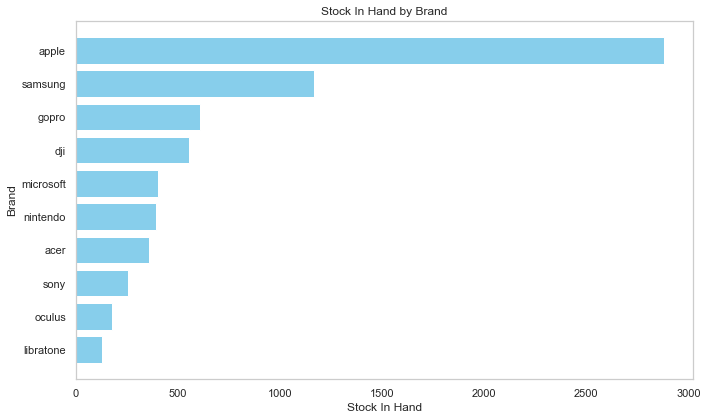

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Brand': ['apple', 'samsung', 'gopro', 'dji', 'microsoft', 'nintendo', 'acer', 'sony', 'oculus', 'libratone'],
    'Stock_In_Hand': [2880.0, 1166.0, 607.0, 555.0, 403.0, 394.0, 359.0, 256.0, 180.0, 131.0]
})

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(data['Brand'], data['Stock_In_Hand'], color='skyblue')

# Add labels and title
plt.xlabel('Stock In Hand')
plt.ylabel('Brand')
plt.title('Stock In Hand by Brand')

# Invert the y-axis to display the highest stock on top
plt.gca().invert_yaxis()

# Turn off grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


In [66]:
df.head()

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.80
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.30
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,119.90,89.90,69.90,64.90,86.15,5599.75
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,129.90,79.90,69.90,59.90,84.90,9339.00
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,NaN,"129.90,159.90","89.90,119.90","59.90,79.90",119.90,3956.70


# KPI's


# 1. Utilization %

In [67]:
df['Utlization_Product'] = df.apply(lambda row: 0 if (row['Stock_In_Hand'] == 0 and row['Orders'] == 0) else (row['Orders'] / row['Stock_In_Hand'])*100 if row['Stock_In_Hand'] != 0 else None, axis=1)


In [121]:
Overallutilzation = df['Orders'].sum() /df['Stock_In_Hand'].sum()*100

Overallutilzation

81.70851797144265

In [122]:
df.head()

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.80
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.30
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,119.90,89.90,69.90,64.90,86.15,5599.75
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,129.90,79.90,69.90,59.90,84.90,9339.00
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,NaN,"129.90,159.90","89.90,119.90","59.90,79.90",119.90,3956.70


In [123]:
Category_Stock = df.groupby('Category')[['Stock_In_Hand','Orders']].sum().reset_index()

In [124]:
Category_Stock['Category_Utilization_percentage'] = (Category_Stock['Orders'] / Category_Stock['Stock_In_Hand'])*100

In [128]:
Category_Stock = Category_Stock.sort_values(by='Category_Utilization_percentage',ascending = False).reset_index(drop=True)

In [129]:
Category_Stock

,Category,Stock_In_Hand,Orders,Category_Utilization_percentage
0,audio-and-music/headphones,333.0,643.0,193.093093
1,wearables/smartwatches,94.0,179.0,190.425532
2,phones-and-tablets/phone-accessories,91.0,173.0,190.109890
3,gaming-and-vr/virtual-reality,273.0,463.0,169.597070
4,gaming-and-vr/gaming-consoles,439.0,661.0,150.569476
5,computers/monitors,48.0,67.0,139.583333
6,e-mobility/scooters,33.0,44.0,133.333333
7,wearables/apple-watches,499.0,586.0,117.434870
8,computers/gaming-computers,43.0,48.0,111.627907
9,computers/computer-accessories,59.0,55.0,93.220339


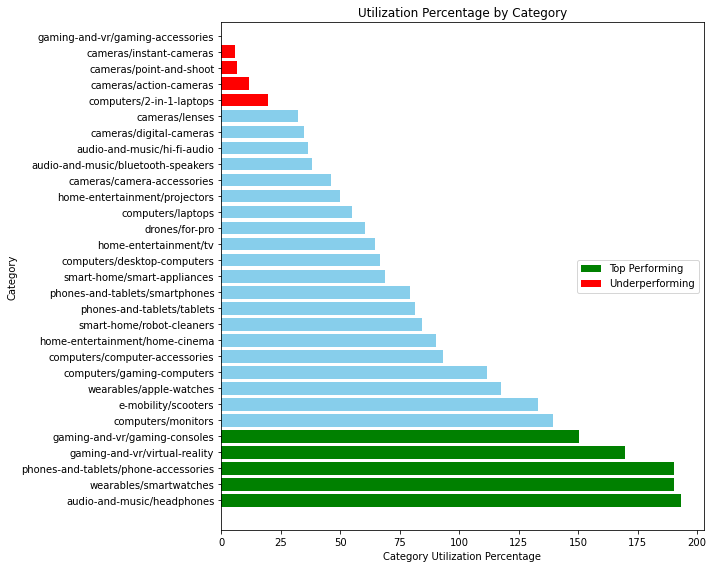

In [131]:
plt.figure(figsize=(10, 8))
plt.barh(Category_Stock['Category'], Category_Stock['Category_Utilization_percentage'], color='skyblue')
plt.xlabel('Category Utilization Percentage')
plt.ylabel('Category')
plt.title('Utilization Percentage by Category')

# Highlight top-performing and underperforming categories
top_performing = Category_Stock.head(5)
underperforming = Category_Stock.tail(5)
plt.barh(top_performing['Category'], top_performing['Category_Utilization_percentage'], color='green', label='Top Performing')
plt.barh(underperforming['Category'], underperforming['Category_Utilization_percentage'], color='red', label='Underperforming')

plt.legend()
plt.tight_layout()
plt.show()

In [1513]:
Category_Stock[Category_Stock['Category'] == 'gaming-and-vr/gaming-consoles'] 

,Category,Stock_In_Hand,Orders,Category_Utilization_percentage
18,gaming-and-vr/gaming-consoles,439.0,661.0,150.569476


In [1514]:
661.0*0.05

33.050000000000004

In [1515]:
439+33.050000000000004

472.05

In [1468]:
Brand_Stock = df.groupby(['Brand','Category'])[['Stock_In_Hand','Orders']].sum().reset_index()

In [1469]:
Brand_Stock['Brand_Utilization_percentage'] = (Brand_Stock['Orders'] / Brand_Stock['Stock_In_Hand'])*100

In [1470]:
Brand_Category_utilization = Brand_Stock.sort_values(by = 'Brand_Utilization_percentage',ascending=False).reset_index(drop=True)

In [1471]:
Brand_Category_utilization = Brand_Category_utilization[Brand_Category_utilization['Brand_Utilization_percentage'] != np.inf]

In [1472]:
Brand_Category_utilization.sort_values(by = 'Brand_Utilization_percentage',ascending=False).reset_index(drop=True)

,Brand,Category,Stock_In_Hand,Orders,Brand_Utilization_percentage
0,sony,gaming-and-vr/gaming-consoles,19.0,322.0,1694.736842
1,fitbit,wearables/smartwatches,7.0,42.0,600.000000
2,apple,audio-and-music/headphones,127.0,498.0,392.125984
3,optoma,home-entertainment/projectors,1.0,3.0,300.000000
4,hp,computers/laptops,14.0,37.0,264.285714
...,...,...,...,...,...
69,jbl,audio-and-music/hi-fi-audio,22.0,1.0,4.545455
70,microsoft,computers/desktop-computers,6.0,0.0,0.000000
71,lenovo,computers/2-in-1-laptops,7.0,0.0,0.000000
72,razer,gaming-and-vr/gaming-accessories,0.0,0.0,NaN


# 2. Conversion Rate


In [135]:
df_orders = df[(df['Orders'] >= 1) & (df['Pageviews'] >= 1)] # We are considering atleast 1 order & pageview

In [136]:
df_orders['Conversion_Rate_Product'] = (df_orders['Orders'] / df_orders['Pageviews'])*100

C:\Users\User\AppData\Local\Temp/ipykernel_1660/1033185927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['Conversion_Rate_Product'] = (df_orders['Orders'] / df_orders['Pageviews'])*100


In [137]:
df_orders.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Conversion_Rate_Product
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.8,1.855969
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.3,1.780844


In [138]:
Converstion_rate_by_category = df_orders.groupby('Category').agg({'Orders': 'sum', 'Pageviews': 'sum'}).reset_index()

In [139]:
Converstion_rate_by_category.head(2)

,Category,Orders,Pageviews
0,audio-and-music/bluetooth-speakers,60.0,5102.0
1,audio-and-music/headphones,643.0,27292.0


In [140]:
Converstion_rate_by_category['Conversion Rate'] = (Converstion_rate_by_category['Orders'] / Converstion_rate_by_category['Pageviews']) * 100


In [141]:
Converstion_rate_by_category = Converstion_rate_by_category.sort_values(by='Conversion Rate', ascending=False).reset_index(drop=True)


In [144]:
Converstion_rate_by_category

,Category,Orders,Pageviews,Conversion Rate
0,phones-and-tablets/phone-accessories,173.0,2378.0,7.275021
1,smart-home/robot-cleaners,43.0,1201.0,3.580350
2,computers/computer-accessories,55.0,1644.0,3.345499
3,smart-home/smart-appliances,11.0,333.0,3.303303
4,wearables/smartwatches,179.0,6532.0,2.740355
5,audio-and-music/headphones,643.0,27292.0,2.356002
6,home-entertainment/home-cinema,82.0,3580.2,2.290375
7,phones-and-tablets/tablets,667.0,29944.0,2.227491
8,wearables/apple-watches,586.0,26529.0,2.208903
9,drones/for-pro,276.0,15061.0,1.832548


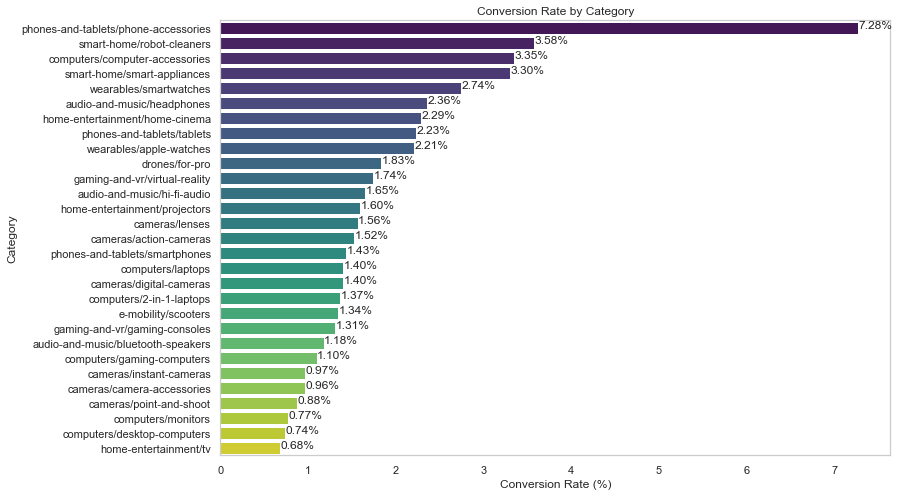

In [1483]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Conversion Rate", y="Category", data=Converstion_rate_by_category, palette="viridis")
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha="center")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Category")
plt.title("Conversion Rate by Category")
plt.grid(False)

plt.show()

In [1484]:
total_orders = Converstion_rate_by_category['Orders'].sum()
total_pageviews = Converstion_rate_by_category['Pageviews'].sum()

overall_conversion_rate = (total_orders / total_pageviews) * 100

print(f"Overall Conversion Rate: {overall_conversion_rate:.2f}%")

Overall Conversion Rate: 1.65%


In [1485]:
df['Conversion Rate'] = df.apply(lambda row: (row['Orders'] / row['Pageviews'] * 100) if (row['Pageviews'] > 0) else 0, axis=1)


In [1487]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Utlization_Product,Conversion Rate
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.8,58.358663,1.855969
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.3,57.069409,1.780844


# # We have an overall Conversion Rate of 1.65 %

# 3. Cancellation Rate

In [1488]:
df['Cancellation_Rate'] = df.apply(lambda row: (row['Cancellations'] / row['Orders'] if row['Orders'] != 0 else 0), axis=1)

In [1489]:
df.head()

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Utlization_Product,Conversion Rate,Cancellation_Rate
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.80,58.358663,1.855969,0.166667
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.30,57.069409,1.780844,0.193694
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,119.90,89.90,69.90,64.90,86.15,5599.75,30.952381,1.797069,0.046154
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,129.90,79.90,69.90,59.90,84.90,9339.00,60.439560,1.062289,0.363636
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,NaN,"129.90,159.90","89.90,119.90","59.90,79.90",119.90,3956.70,54.098361,0.697380,0.060606


In [1490]:
high_cancellation_products = df.sort_values(by='Cancellation_Rate', ascending=False)


In [1491]:
high_cancellation_products

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Utlization_Product,Conversion Rate,Cancellation_Rate
248,249.0,Product 249,drones/for-pro,dji,23.0,38.652174,1.0,14.0,102.0,79.0,22.90,14.90,12.90,9.90,15.15,15.15,4.347826,0.980392,14.000000
296,297.0,Product 297,phones-and-tablets/smartphones,xiaomi,8.0,87.500000,4.0,28.0,354.0,491.0,"39.90,44.90","29.90,34.90","24.90,29.90","22.90,24.90",33.65,134.60,50.000000,1.129944,7.000000
272,273.0,Product 273,cameras/point-and-shoot,sony,15.0,50.333333,1.0,7.0,114.0,495.0,"59.90,64.90","39.90,44.90","32.90,34.90","22.90,24.90",42.40,42.40,6.666667,0.877193,7.000000
149,150.0,Product 150,phones-and-tablets/smartphones,samsung,16.0,13.000000,3.0,20.0,645.0,999.0,99.90,69.90,59.90,49.90,69.90,209.70,18.750000,0.465116,6.666667
299,300.0,Product 300,phones-and-tablets/smartphones,google,11.0,105.363636,1.0,6.0,82.0,849.0,54.90,39.90,34.90,29.90,39.90,39.90,9.090909,1.219512,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196.0,Product 196,phones-and-tablets/tablets,samsung,15.0,13.000000,0.0,0.0,523.2,590.0,69.90,44.90,39.90,34.90,47.40,0.00,0.000000,0.000000,0.000000
194,195.0,Product 195,phones-and-tablets/tablets,samsung,15.0,13.000000,0.0,0.0,388.6,511.0,59.90,39.90,34.90,29.90,41.15,0.00,0.000000,0.000000,0.000000
192,193.0,Product 193,phones-and-tablets/tablets,microsoft,10.0,40.000000,0.0,0.0,1199.6,2134.0,189.90,149.90,119.90,109.90,142.40,0.00,0.000000,0.000000,0.000000
191,192.0,Product 192,phones-and-tablets/smartphones,apple,30.0,0.000000,0.0,0.0,487.8,479.0,69.90,49.90,39.90,34.90,48.65,0.00,0.000000,0.000000,0.000000


In [1492]:
cancellation_rates_by_category = df.groupby('Category')['Cancellation_Rate'].mean().sort_values(ascending=False).reset_index()


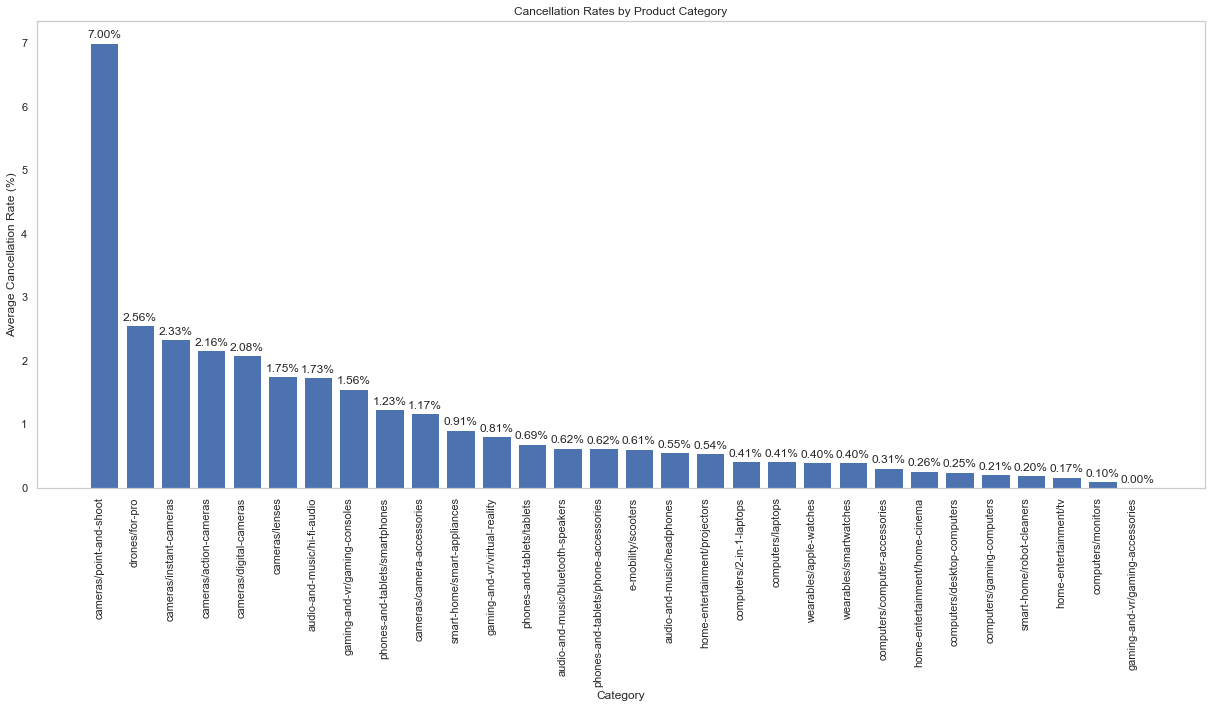

In [1493]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 10))
width = 0.8
bars = plt.bar(cancellation_rates_by_category['Category'], cancellation_rates_by_category['Cancellation_Rate'], width=width)
plt.xlabel('Category')
plt.ylabel('Average Cancellation Rate (%)')
plt.title('Cancellation Rates by Product Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.grid(False)

plt.show()


In [1494]:
overall_cancellation_rate = (df['Cancellations'].sum() / df['Orders'].sum())*100
overall_cancellation_rate

59.35522747815607

# Cancellation rate for April is 59.35%

# 4. Cancellation Cost Ratio

In [156]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Revenue_lost_Cancellations,Cancellation_cost_ratio
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.8,2356.80,16.666667
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.3,1016.95,19.369369


In [157]:
df['Revenue_lost_Cancellations'] = df['Avg_Subscription_Price'] * df['Cancellations']

In [158]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Revenue_lost_Cancellations,Cancellation_cost_ratio
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.8,2356.80,16.666667
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.3,1016.95,19.369369


In [159]:
df['Cancellation_cost_ratio'] = 0  

non_zero_denominator = df['Total_Revenue_Product'] != 0  

df.loc[non_zero_denominator, 'Cancellation_cost_ratio'] = (df.loc[non_zero_denominator, 'Revenue_lost_Cancellations'] / df.loc[non_zero_denominator, 'Total_Revenue_Product']) * 100

In [160]:
df

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,1_M,3_M,6_M,12_M,Avg_Subscription_Price,Total_Revenue_Product,Revenue_lost_Cancellations,Cancellation_cost_ratio
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,"79.90,99.90","49.90,69.90","44.90,64.90","39.90,59.90",73.65,14140.80,2356.80,16.666667
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,34.90,24.90,19.90,14.90,23.65,5250.30,1016.95,19.369369
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,119.90,89.90,69.90,64.90,86.15,5599.75,258.45,4.615385
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,129.90,79.90,69.90,59.90,84.90,9339.00,3396.00,36.363636
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,NaN,"129.90,159.90","89.90,119.90","59.90,79.90",119.90,3956.70,239.80,6.060606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297.0,Product 297,phones-and-tablets/smartphones,xiaomi,8.0,87.500000,4.0,28.0,354.0,491.0,"39.90,44.90","29.90,34.90","24.90,29.90","22.90,24.90",33.65,134.60,942.20,700.000000
297,298.0,Product 298,computers/desktop-computers,microsoft,6.0,69.500000,0.0,0.0,665.4,4695.0,"389.90,399.90","289.90,299.90","229.90,239.90","199.90,209.90",287.40,0.00,0.00,0.000000
298,299.0,Product 299,phones-and-tablets/tablets,microsoft,9.0,56.222222,1.0,3.0,333.0,1718.0,"109.90,119.90","79.90,89.90","64.90,79.90","54.90,69.90",89.90,89.90,269.70,300.000000
299,300.0,Product 300,phones-and-tablets/smartphones,google,11.0,105.363636,1.0,6.0,82.0,849.0,54.90,39.90,34.90,29.90,39.90,39.90,239.40,600.000000


In [170]:
costcancellation_cat = df.groupby('Category')['Cancellation_cost_ratio'].mean().sort_values(ascending=False).reset_index()


In [171]:
costcancellation_cat

,Category,Cancellation_cost_ratio
0,cameras/point-and-shoot,700.000000
1,drones/for-pro,255.566221
2,cameras/instant-cameras,233.333333
3,cameras/action-cameras,216.192447
4,cameras/digital-cameras,208.411956
5,cameras/lenses,175.000000
6,audio-and-music/hi-fi-audio,173.333333
7,gaming-and-vr/gaming-consoles,155.857939
8,phones-and-tablets/smartphones,122.886136
9,cameras/camera-accessories,116.666667


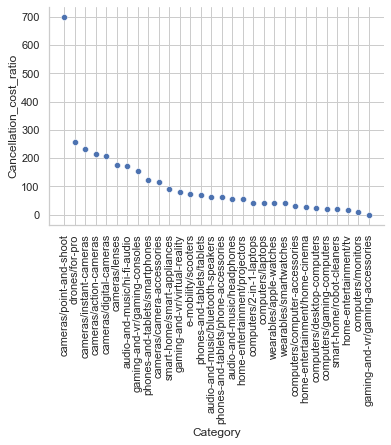

In [183]:
sns.scatterplot(x='Category', y='Cancellation_cost_ratio', data=costcancellation_cat, palette='viridis')
plt.xticks(rotation=90)

# Remove the grids
sns.despine()

# Display the plot
plt.show()

In [150]:
Total_revenue_lost = df['Revenue_lost_Cancellations'].sum()
round(Total_revenue_lost)

198794

In [151]:
Revenue_generated

356759.40000000014

In [152]:
Overall_Cancellation_Cost_Ratio = (Total_revenue_lost / Revenue_generated) * 100
round(Overall_Cancellation_Cost_Ratio)

56

# 56 % of the revenue generated is impacted due to the order cancellations

...

In [222]:
df_growth_target_may = pd.read_excel('D:\dataset\Grover.xlsx',sheet_name='Growth Targets May')

In [223]:
df_growth_target_may.head(5)

,Unnamed: 0,In May we expect the following MoM orders' growth trend
0,Category,Growth Target
1,phones-and-tablets/smartphones,0.05
2,gaming-and-vr/gaming-consoles,0.05
3,computers/laptops,0.08
4,home-entertainment/tv,0.05


In [224]:
cols = df_growth_target_may.iloc[0].tolist()

df_growth_target_may.columns = cols

df_growth_target_may = df_growth_target_may.iloc[1:]


In [225]:
df_growth_target_may.head(5)

,Category,Growth Target
1,phones-and-tablets/smartphones,0.05
2,gaming-and-vr/gaming-consoles,0.05
3,computers/laptops,0.08
4,home-entertainment/tv,0.05
5,drones/for-pro,0.25


In [226]:
def calculate_projected_sales_May(row):
    
    growth_target = df_growth_target_may[df_growth_target_may['Category'] == row['Category']]['Growth Target'].values[0]
    
    return row['Orders'] * (1 + growth_target)

In [227]:
df['Projected_Sales_for_May'] = df.apply(calculate_projected_sales_May, axis=1)

In [228]:
df[['Category', 'Orders' , 'Projected_Sales_for_May']]

,Category,Orders,Projected_Sales_for_May
0,phones-and-tablets/smartphones,192.0,201.60
1,gaming-and-vr/gaming-consoles,222.0,233.10
2,computers/laptops,65.0,70.20
3,phones-and-tablets/smartphones,110.0,115.50
4,home-entertainment/tv,33.0,34.65
...,...,...,...
296,phones-and-tablets/smartphones,4.0,4.20
297,computers/desktop-computers,0.0,0.00
298,phones-and-tablets/tablets,1.0,1.06
299,phones-and-tablets/smartphones,1.0,1.05


In [229]:
192 * 0.05

9.600000000000001

In [230]:
192 + 9.600000000000001


201.6

In [231]:
Total_demand_for_may = df['Projected_Sales_for_May'].sum()
Total_demand_for_may

7122.32

In [232]:
total_stock_on_hand = df['Stock_In_Hand'].sum()
total_stock_on_hand

8124.0

In [233]:
inventory_shortfall_or_surplus = total_stock_on_hand - Total_demand_for_may
if inventory_shortfall_or_surplus >= 0:
    print("You have a surplus of inventory for May.")
    print("Surplus Amount:", inventory_shortfall_or_surplus)
else:
    print("You have a shortfall of inventory for May.")
    print("Shortfall Amount:", abs(inventory_shortfall_or_surplus))

You have a surplus of inventory for May.
Surplus Amount: 1001.6800000000003


In [234]:
df.columns

Index(['Rank', 'Name', 'Category', 'Brand', 'Stock_In_Hand', 'Avg. AGE',
       'Orders', 'Cancellations', 'Pageviews', 'MarketPrice', '1_M', '3_M',
       '6_M', '12_M', 'Avg_Subscription_Price', 'Total_Revenue_Product',
       'Revenue_lost_Cancellations', 'Cancellation_cost_ratio',
       'Projected_Sales_for_May'],
      dtype='object')

In [235]:
df['Stock In Hand'] = df['Stock_In_Hand'].astype(int)

In [236]:
May_Sales_to_SOH = df.groupby("Category")[['Projected_Sales_for_May', 'Stock_In_Hand']].sum().sort_values(by='Projected_Sales_for_May', ascending=False).reset_index()


In [237]:
May_Sales_to_SOH.head()

,Category,Projected_Sales_for_May,Stock_In_Hand
0,phones-and-tablets/smartphones,1812.30,2174.0
1,phones-and-tablets/tablets,707.02,819.0
2,gaming-and-vr/gaming-consoles,694.05,439.0
3,audio-and-music/headphones,688.01,333.0
4,wearables/apple-watches,627.02,499.0


In [238]:
May_Sales_to_SOH.columns

Index(['Category', 'Projected_Sales_for_May', 'Stock_In_Hand'], dtype='object')

In [239]:
def generate_recommendation(row):
    if row['Projected_Sales_for_May'] > row['Stock_In_Hand']:
        return "Increase Stock"
    else:
        return "No Change"

May_Sales_to_SOH['Recommendation'] = May_Sales_to_SOH.apply(generate_recommendation, axis=1)

In [240]:
May_Sales_to_SOH.to_csv('Supplyplanning_formay.csv')

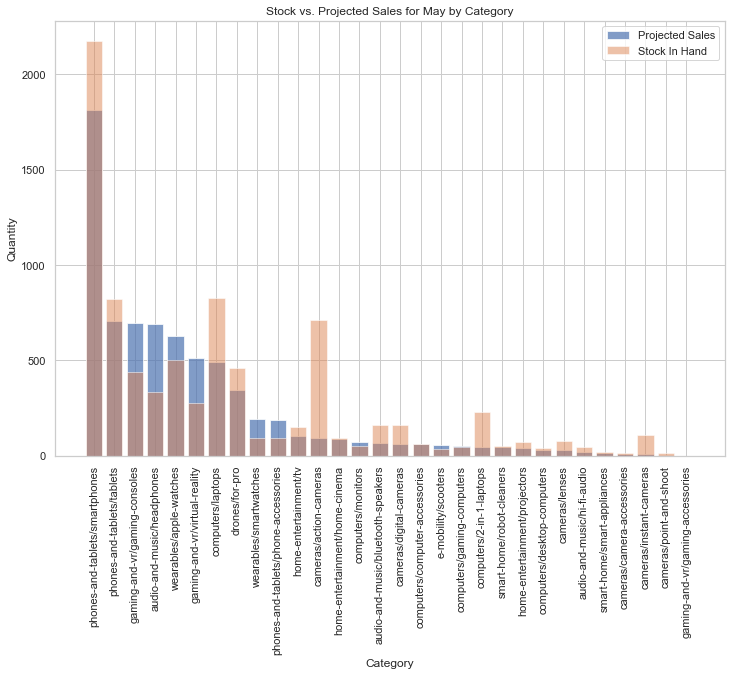

In [1261]:
May_Sales_to_SOH = May_Sales_to_SOH.sort_values(by='Projected Sales for May', ascending=False)

plt.figure(figsize=(12, 8))

plt.bar(May_Sales_to_SOH['Category'], May_Sales_to_SOH['Projected Sales for May'], label='Projected Sales', alpha=0.7)

plt.bar(May_Sales_to_SOH['Category'], May_Sales_to_SOH['Stock_In_Hand'], label='Stock In Hand', alpha=0.5)

plt.xlabel('Category')

plt.ylabel('Quantity')

plt.title('Stock vs. Projected Sales for May by Category')

plt.xticks(rotation=90)

plt.legend()


plt.show()


.....

In [1262]:
df.head()

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,...,12_M,Avg_Subscription_Price,Total_Revenue_Product,Stock_Turnover_Ratio,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Stock In Hand
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,...,"39.90,59.90",73.65,14140.80,58.358663,1.855969,0.166667,2356.80,16.666667,201.60,329
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,...,14.90,23.65,5250.30,57.069409,1.780844,0.193694,1016.95,19.369369,233.10,389
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,...,64.90,86.15,5599.75,30.952381,1.797069,0.046154,258.45,4.615385,70.20,210
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,...,59.90,84.90,9339.00,60.439560,1.062289,0.363636,3396.00,36.363636,115.50,182
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,...,"59.90,79.90",119.90,3956.70,54.098361,0.697380,0.060606,239.80,6.060606,34.65,61


In [1263]:
df['projected_product_revenue_may'] = df['Projected Sales for May'] * df['Avg_Subscription_Price']

In [1264]:
df.head(2)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,...,Avg_Subscription_Price,Total_Revenue_Product,Stock_Turnover_Ratio,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Stock In Hand,projected_product_revenue_may
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,...,73.65,14140.8,58.358663,1.855969,0.166667,2356.80,16.666667,201.6,329,14847.840
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,...,23.65,5250.3,57.069409,1.780844,0.193694,1016.95,19.369369,233.1,389,5512.815


In [1265]:
df['Percentage_Revenue_Change'] = df.apply(lambda row: ((row['projected_product_revenue_may'] - row['Total_Revenue_Product']) / row['Total_Revenue_Product']) * 100 if row['Total_Revenue_Product'] != 0 else None, axis=1)


In [1266]:
df.head(5)

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,...,Total_Revenue_Product,Stock_Turnover_Ratio,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Stock In Hand,projected_product_revenue_may,Percentage_Revenue_Change
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,...,14140.80,58.358663,1.855969,0.166667,2356.80,16.666667,201.60,329,14847.840,5.0
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,...,5250.30,57.069409,1.780844,0.193694,1016.95,19.369369,233.10,389,5512.815,5.0
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,...,5599.75,30.952381,1.797069,0.046154,258.45,4.615385,70.20,210,6047.730,8.0
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,...,9339.00,60.439560,1.062289,0.363636,3396.00,36.363636,115.50,182,9805.950,5.0
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,...,3956.70,54.098361,0.697380,0.060606,239.80,6.060606,34.65,61,4154.535,5.0


In [1268]:
Total_revenue_change = df['projected_product_revenue_may'].sum() - df['Total_Revenue_Product'].sum()

Total_percentage_change = (Total_revenue_change / df['Total_Revenue_Product'].sum()) * 100

print(f"Total Percentage Change Revenue April_may: {total_percentage_change:.2f}%")

Total Percentage Change Revenue April_may: 7.28%


In [1269]:
df

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,...,Total_Revenue_Product,Stock_Turnover_Ratio,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Stock In Hand,projected_product_revenue_may,Percentage_Revenue_Change
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,...,14140.80,58.358663,1.855969,0.166667,2356.80,16.666667,201.60,329,14847.840,5.0
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,...,5250.30,57.069409,1.780844,0.193694,1016.95,19.369369,233.10,389,5512.815,5.0
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,...,5599.75,30.952381,1.797069,0.046154,258.45,4.615385,70.20,210,6047.730,8.0
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,...,9339.00,60.439560,1.062289,0.363636,3396.00,36.363636,115.50,182,9805.950,5.0
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,...,3956.70,54.098361,0.697380,0.060606,239.80,6.060606,34.65,61,4154.535,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297.0,Product 297,phones-and-tablets/smartphones,xiaomi,8.0,87.500000,4.0,28.0,354.0,491.0,...,134.60,50.000000,1.129944,7.000000,942.20,700.000000,4.20,8,141.330,5.0
297,298.0,Product 298,computers/desktop-computers,microsoft,6.0,69.500000,0.0,0.0,0.0,4695.0,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,6,0.000,NaN
298,299.0,Product 299,phones-and-tablets/tablets,microsoft,9.0,56.222222,1.0,3.0,333.0,1718.0,...,89.90,11.111111,0.300300,3.000000,269.70,300.000000,1.06,9,95.294,6.0
299,300.0,Product 300,phones-and-tablets/smartphones,google,11.0,105.363636,1.0,6.0,82.0,849.0,...,39.90,9.090909,1.219512,6.000000,239.40,600.000000,1.05,11,41.895,5.0


In [1563]:
df

,Rank,Name,Category,Brand,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,...,Avg_Subscription_Price,Total_Revenue_Product,Utlization_Product,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Projected_Sales_for_May,Stock In Hand
0,1.0,Product 1,phones-and-tablets/smartphones,samsung,329.0,39.765957,192.0,32.0,10345.0,1101.0,...,73.65,14140.80,58.358663,1.855969,0.166667,2356.80,16.666667,201.60,201.60,329
1,2.0,Product 2,gaming-and-vr/gaming-consoles,nintendo,389.0,11.871465,222.0,43.0,12466.0,229.0,...,23.65,5250.30,57.069409,1.780844,0.193694,1016.95,19.369369,233.10,233.10,389
2,3.0,Product 3,computers/laptops,apple,210.0,7.900000,65.0,3.0,3617.0,1199.0,...,86.15,5599.75,30.952381,1.797069,0.046154,258.45,4.615385,70.20,70.20,210
3,4.0,Product 4,phones-and-tablets/smartphones,apple,182.0,37.192308,110.0,40.0,10355.0,1195.0,...,84.90,9339.00,60.439560,1.062289,0.363636,3396.00,36.363636,115.50,115.50,182
4,5.0,Product 5,home-entertainment/tv,LG,61.0,39.000000,33.0,2.0,4732.0,1799.0,...,119.90,3956.70,54.098361,0.697380,0.060606,239.80,6.060606,34.65,34.65,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297.0,Product 297,phones-and-tablets/smartphones,xiaomi,8.0,87.500000,4.0,28.0,354.0,491.0,...,33.65,134.60,50.000000,1.129944,7.000000,942.20,700.000000,4.20,4.20,8
297,298.0,Product 298,computers/desktop-computers,microsoft,6.0,69.500000,0.0,0.0,665.4,4695.0,...,287.40,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,6
298,299.0,Product 299,phones-and-tablets/tablets,microsoft,9.0,56.222222,1.0,3.0,333.0,1718.0,...,89.90,89.90,11.111111,0.300300,3.000000,269.70,300.000000,1.06,1.06,9
299,300.0,Product 300,phones-and-tablets/smartphones,google,11.0,105.363636,1.0,6.0,82.0,849.0,...,39.90,39.90,9.090909,1.219512,6.000000,239.40,600.000000,1.05,1.05,11


In [1564]:
df.columns

Index(['Rank', 'Name', 'Category', 'Brand', 'Stock_In_Hand', 'Avg. AGE',
       'Orders', 'Cancellations', 'Pageviews', 'MarketPrice', '1_M', '3_M',
       '6_M', '12_M', 'Avg_Subscription_Price', 'Total_Revenue_Product',
       'Utlization_Product', 'Conversion Rate', 'Cancellation_Rate',
       'Revenue_lost_Cancellations', 'Cancellation_cost_ratio',
       'Projected Sales for May', 'Projected_Sales_for_May', 'Stock In Hand'],
      dtype='object')

In [1566]:
df.corr()

,Rank,Stock_In_Hand,Avg. AGE,Orders,Cancellations,Pageviews,MarketPrice,Avg_Subscription_Price,Total_Revenue_Product,Utlization_Product,Conversion Rate,Cancellation_Rate,Revenue_lost_Cancellations,Cancellation_cost_ratio,Projected Sales for May,Projected_Sales_for_May,Stock In Hand
Rank,1.000000,-0.546705,-0.052551,-0.468742,-0.314864,-0.420424,0.066432,0.057332,-0.486952,0.111926,0.073333,0.110194,-0.370801,0.109665,-0.471695,-0.471695,-0.546705
Stock_In_Hand,-0.546705,1.000000,0.079762,0.531798,0.326975,0.552898,-0.109131,-0.101691,0.501779,-0.097145,-0.054753,0.069422,0.317086,0.069041,0.529560,0.529560,1.000000
Avg. AGE,-0.052551,0.079762,1.000000,-0.116699,-0.120303,-0.128803,0.023196,0.001749,-0.119787,-0.150473,-0.108023,0.069555,-0.118485,0.068906,-0.116973,-0.116973,0.079762
Orders,-0.468742,0.531798,-0.116699,1.000000,0.630492,0.874951,-0.149872,-0.131106,0.832752,0.257000,-0.027393,-0.084671,0.522212,-0.084863,0.999180,0.999180,0.531798
Cancellations,-0.314864,0.326975,-0.120303,0.630492,1.000000,0.616947,-0.191416,-0.167821,0.502670,0.344389,-0.037537,0.267603,0.871665,0.267455,0.630495,0.630495,0.326975
Pageviews,-0.420424,0.552898,-0.128803,0.874951,0.616947,1.000000,-0.043133,-0.026416,0.844108,0.183510,-0.058286,-0.043771,0.569504,-0.043966,0.870931,0.870931,0.552898
MarketPrice,0.066432,-0.109131,0.023196,-0.149872,-0.191416,-0.043133,1.000000,0.949906,0.063864,-0.069446,-0.058667,-0.180392,-0.008620,-0.181167,-0.151753,-0.151753,-0.109131
Avg_Subscription_Price,0.057332,-0.101691,0.001749,-0.131106,-0.167821,-0.026416,0.949906,1.000000,0.098916,-0.064522,-0.065780,-0.184032,0.024914,-0.184032,-0.131751,-0.131751,-0.101691
Total_Revenue_Product,-0.486952,0.501779,-0.119787,0.832752,0.502670,0.844108,0.063864,0.098916,1.000000,0.167739,-0.038213,-0.100427,0.612735,-0.100427,0.831282,0.831282,0.501779
Utlization_Product,0.111926,-0.097145,-0.150473,0.257000,0.344389,0.183510,-0.069446,-0.064522,0.167739,1.000000,0.107662,-0.021462,0.168358,-0.021462,0.255644,0.255644,-0.097145


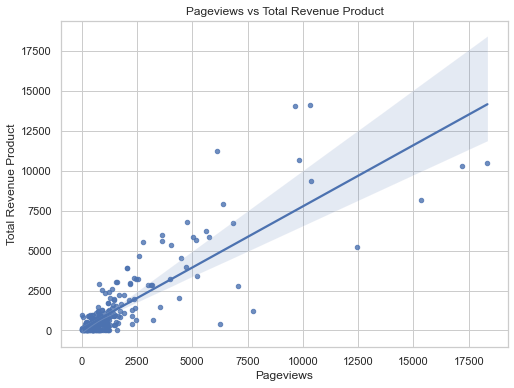

In [1575]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Pageviews', y='Total_Revenue_Product', scatter_kws={'s': 20})
plt.title('Pageviews vs Total Revenue Product')
plt.xlabel('Pageviews')
plt.ylabel('Total Revenue Product')
plt.grid(True)
plt.show()